# Notebook used for function writing

In [1]:
import pandas as pd
import sys
import os
#Define user path
sys.path.append(os.path.abspath('../'))

from galpy.df import streamdf, streamgapdf
from galpy.orbit import Orbit
from galpy.potential import LogarithmicHaloPotential
from galpy.actionAngle import actionAngleIsochroneApprox
from galpy.util import conversion
import numpy


## Tests on stream_sim

In [2]:
##Load sts config file
# Path to the yaml config file in the 'config' folder
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
config_file = 'erkal_2016_pal_5_input.csv'
config_path = os.path.join(base_dir, 'generated_data', config_file)

derkal_data = pd.read_csv(config_path)

#config_data
print(derkal_data['nstars']*(0.02*derkal_data['width']))
numpy.sum(derkal_data['nstars']*(0.02*derkal_data['width']))



FileNotFoundError: [Errno 2] No such file or directory: '/home/hallouin/Documents/thall_2025/Streams/stream_sim_hall/generated_data/erkal_2016_pal_5_input.csv'

In [ ]:
###what's nstars ?


## Mock stream generation

In [ ]:
lp= LogarithmicHaloPotential(normalize=1.,q=0.9)
aAI= actionAngleIsochroneApprox(pot=lp,b=0.8)
prog_unp_peri= Orbit([2.6556151742081835,
                          0.2183747276300308,
                          0.67876510797240575,
                          -2.0143395648974671,
                          -0.3273737682604374,
                          0.24218273922966019])
V0, R0= 220., 8.
sigv= 0.365*(10./2.)**(1./3.) # km/s
tdisrupt= 10.88/conversion.time_in_Gyr(V0,R0)
print(tdisrupt)


305.9954797816719


In [ ]:
GM= 10.**-2./conversion.mass_in_1010msol(V0,R0)
rs= 0.625/R0
impactb= 0.
subhalovel= numpy.array([6.82200571,132.7700529,149.4174464])/V0
timpact= 0.88/conversion.time_in_Gyr(V0,R0)
impact_angle= -2.34
print(timpact)

24.74963439410582


In [ ]:
sdf_sanders15= streamgapdf(sigv/V0,progenitor=prog_unp_peri,pot=lp,aA=aAI,
                               leading=False,nTrackChunks=26,
                               nTrackIterations=1,
                               sigMeanOffset=4.5,
                               tdisrupt=tdisrupt,
                               Vnorm=V0,Rnorm=R0,
                               impactb=impactb,
                               subhalovel=subhalovel,
                               timpact=timpact,
                               impact_angle=impact_angle,
                               GM=GM,rs=rs)


: 

Fit successful: A=51.91, mu=-0.63, sigma=0.52, nfev=8


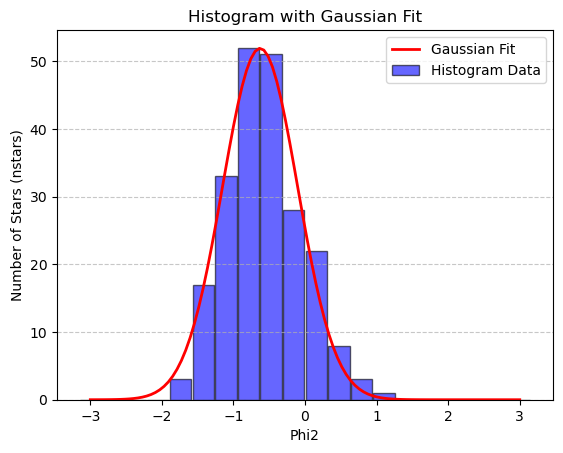

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares, curve_fit

# Example data (adjust with your real data)
phi2 = np.linspace(-3, 3, 20)  
nstars = np.random.poisson(lam=50 * np.exp(-((phi2 + 0.5) ** 2) / (2 * 0.5**2)), size=len(phi2))

# Define Gaussian function
def gaussian(params, x):
    A, mu, sigma = params
    return A * np.exp(-((x - mu) ** 2) / (2 * sigma**2))

# Residual function for least_squares
def residuals(params, x, y):
    return gaussian(params, x) - y

# Initial parameter guesses
max_idx = np.argmax(nstars)  
initial_mu = phi2[max_idx]   
initial_sigma = np.sqrt(np.average((phi2 - initial_mu) ** 2, weights=nstars))  
p0 = [max(nstars), initial_mu, initial_sigma]

# Set max function evaluations
max_fev = 100

# Perform least_squares optimization
result = least_squares(residuals, p0, args=(phi2, nstars), max_nfev=max_fev)

# Extract nfev and check if it exceeds max_fev
if result.nfev < max_fev:
    A_fit, mu_fit, sigma_fit = result.x
    print(f"Fit successful: A={A_fit:.2f}, mu={mu_fit:.2f}, sigma={sigma_fit:.2f}, nfev={result.nfev}")
else:
    print(f"Fit failed: nfev={result.nfev} exceeded max_fev={max_fev}")
    exit()  # Stop execution or handle this case differently

# Plot histogram
plt.bar(phi2, nstars, width=0.3, alpha=0.6, color='b', edgecolor='black', label="Histogram Data")

# Plot the fitted Gaussian
phi2_fine = np.linspace(min(phi2), max(phi2), 100)
plt.plot(phi2_fine, gaussian([A_fit, mu_fit, sigma_fit], phi2_fine), 'r-', linewidth=2, label="Gaussian Fit")

# Labels and title
plt.xlabel('Phi2')
plt.ylabel('Number of Stars (nstars)')
plt.title('Histogram with Gaussian Fit')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [7]:
endpoints = coord.SkyCoord(
    ra=[-38.8, 4.7]*u.deg,
    dec=[-45.1, -51.7]*u.deg
)
great_circle_frame = gc.GreatCircleICRSFrame.from_endpoints(endpoints[0], endpoints[1], origin=origin)

NameError: name 'coord' is not defined

In [8]:
stars = coord.SkyCoord(
    ra=[10.0, 20.0, 30.0]*u.deg,
    dec=[-40.0, -42.0, -38.5]*u.deg,
    frame='icrs'
)

stars_transformed = stars.transform_to(great_circle_frame)

NameError: name 'coord' is not defined

In [10]:
popt, _ = curve_fit(gaussian, phi2, nstars, p0=[max(nstars), phi2[np.argmax(nstars)], 1])

A_fit, mu_fit, sigma_fit = popt

plt.figure()

phi2_fine = np.linspace(-3, 2, 200)
plt.bar(phi2, nstars, width=0.1, edgecolor='b')
plt.plot(phi2_fine, gaussian(phi2_fine, *popt), 'r-', linewidth=2, label="Gaussian Fit")
plt.show()
print(f"Fitted Parameters: Amplitude = {A_fit:.2f}, Mean = {mu_fit:.2f}, Std Dev = {sigma_fit:.2f}")

TypeError: gaussian() takes 2 positional arguments but 4 were given

In [ ]:
### Phi12 fitting using curvefit

from astropy.table import Table
import scipy.optimize as opt

def gaussian(x, A, mu, sigma):
    return A * np.exp(-((x - mu) ** 2) / (2 * sigma**2))


def stream_density(stream, delta_phi1 = 0.02):
    ''' Calculates the linear density along a stellar stream
     - stream = the stream, in shape [[star1], [star2], ...]
     - each star have at least [phi1, phi2] as data. + [pmphi1, pmphi2, magr,...]
     - phi1_delta = bins in phi1 axis.

    Returns pddataframe with:
     - phi1 
     - phi2 = to mid track at phi1
     - nstar = to density at phi1
     - width = to track width at phi1
    '''
    ###retrieve stream data
    #todo
    # if arg_type =='pdframe':
    #     phi1 = stream['phi1']
    #     phi2 = stream['phi2']
    # elif arg_type == 'list':
    #     phi1 = stream.T[0]
    #     phi2 = stream.T[1]
    phi1_stars = stream.T[0]
    phi2_stars = stream.T[1]
    # np.random.seed(42)
    # phi1_stars = np.random.uniform(-6, 16, 1000)  # 1000 stars in the range [-6, 16]
    # phi2_stars = np.random.uniform(-2.5, 0, 1000)  # 1000 stars in the range [-2.5, 0]
    phi1_min = np.min(phi1_stars) + delta_phi1
    phi1_max = np.max(phi1_stars) - delta_phi1
    phi2_min = np.min(phi2_stars)
    phi2_max = np.max(phi2_stars)
    nbins1 = int((phi1_max - phi1_min)/delta_phi1)
    print(nbins1)
    # 1: Initialize empty lists for each column in the results table
    phi1_vals = []
    phi2_vals = []
    nstars_vals = []
    width_vals = []

    # 2: Loop through Phi1 window to calculate local density
    for phi1_t in np.arange(phi1_min, phi1_max, delta_phi1):
        # 2a: Select the stars within the Phi1 window
        #fixed width in Phi2 for the moment
        width = 0.2  #
        nbins2 = nbins1
        mask_phi1 = (np.abs(phi1_stars - phi1_t) < width)
        selected_phi1 = phi1_stars[mask_phi1]
        selected_phi2 = phi2_stars[mask_phi1]

        if len(selected_phi1) > 0:
            # 2b: Find the Phi2 corresponding to maximum star density
            hist_nstars, bin_phi2 = np.histogram(selected_phi2, bins=nbins1, range=(phi2_min, phi2_max)) #1D histogram in the Phi2 direction
            max_bin_idx = np.argmax(hist_nstars)  #first estimation by nstars maximum
            max_phi2 = (bin_phi2[max_bin_idx] + bin_phi2[max_bin_idx + 1]) / 2  # The middle of the bin
            # print(hist_nstars)
            #precise estimation by gaussian fit
            popt, _,u,f,g = opt.curve_fit(gaussian, bin_phi2[:-1], hist_nstars, p0=[max(hist_nstars), max_phi2, 1], maxfev = 100000, full_output=True)
            A_fit, mu_fit, sigma_fit = popt

            # 2c: Count the stars in this region (n_stars)
            n_stars = np.sum(mask_phi1)

            # Append the results for this step to the respective lists
            phi1_vals.append(phi1_t)#
            phi2_vals.append(mu_fit)#phi2 at the center of the hist
            nstars_vals.append(A_fit)#maximum of the gaussian
            width_vals.append(sigma_fit)#width


        # 3: Create a table to store the results
    density_table = Table([phi1_vals, phi2_vals, nstars_vals, width_vals], 
                            names=('phi1', 'phi2', 'nstars', 'width'))

    return density_table

stream_erkal = stream_density(stream_phi12, delta_phi1=0.1)

print(stream_erkal[350:450]) #actually, the distribution of stars along Phi2 in a bin Phi1 is defined by a gaussian of maximum nstars, mean Phi2 and std width.
# Plot the density in the frame (scatter plot of phi1, phi2 values)
plt.figure(figsize=(10, 6))
plt.hist2d(stream_phi12.T[0], stream_phi12.T[1], bins=100, cmap='plasma')
plt.scatter(stream_erkal['phi1'], stream_erkal['phi2'], c=stream_erkal['nstars'], cmap='gist_yarg', s=5)
plt.colorbar(label='Number of Stars')
plt.xlabel('phi1 (degrees)')
plt.ylabel('phi2 (degrees)')
plt.title('Star Density Along the Stream')
# plt.grid(True)
plt.show()



# Main notebook addons

In [ ]:
### Modelise Non-perturbed stream using Chen2024 formalism

#initiate spray function, two parts ; leading and trailing part of the stream (leading = {True, False})
# stream_c24_lead = gd.chen24spraydf(progenitor_mass=prog_mass,
#                         progenitor=prog_orbit, 
#                         pot=mw_pot, rtpot=None, #host potential and tidal radius potential
#                         tdisrupt=t_disrupt, 
#                         leading=True, 
#                         center=None, centerpot=None, 
#                         progpot=prog_pot, 
#                         mean=None, cov=None, ro=None, vo=None)

# stream_c24_trail = gd.chen24spraydf(progenitor_mass=prog_mass,
#                         progenitor=prog_orbit, 
#                         pot=mw_pot, rtpot=None, #host potential and tidal radius potential
#                         tdisrupt=t_disrupt, 
#                         leading=False, 
#                         center=None, centerpot=None, 
#                         progpot=prog_pot, 
#                         mean=None, cov=None, ro=None, vo=None)


In [ ]:
# # Integrating the progenitor orbit back in time to get the orbit instance at t_disrupt
# ts= np.linspace(0.,4.5*u.Gyr,1000)
# prog_orbit.integrate(-ts,mw_pot)
# print(prog_orbit.x(t=-4.5*u.Gyr),prog_orbit.y(t=-4.5*u.Gyr),prog_orbit.z(t=-4.5*u.Gyr))
# # prog_orbit.plot3d(d1='x',d2='y', d3='z')
